# Evaluate multi-class probabilities to understand the impact on a choice

This is a **prototype** notebook to answer the question "in a multi-class classifier, when we have few labels and a large dataset to label, how can we visualise the quality of discrimination?"

The easy answer is to always say "whichever class gets the highest probability wins". The next best answer might be to cut-off any predictions where the best probability was under a threshold, say `P(c) > 0.3`.

In this scenario we can assume that 1 class _should_ win (according to a business need) and the cost of making an incorrect assignment is high, so we only want "good classifications".

Perhaps more usefully we could sort the predictions per-row into descending order, so each row for 4 classes has a result like `(0.8, 0.1, 0.05, 0.05)` where "ordered class 0 has probability 80%", so the best guess from the classifier gives 80% likelihood to one class and 10% to the next and a trivial amount to the two remaining.

A really bad classification would give probabilities `(0.26, 0.25, 0.25, 0.24)` as they'd all be almost equally unlikely.

An unhelpful classification might be `(0.5, 0.5, 0, 0)` where two classes are above a low threshold of 0.3 but equally likely.

If in a business case we want just 1 best assignment, the first example is a clear winner (shown on the diagram below in the bottom-right corner). The second example has a "winner" as 0.26 beats the other numbers, but the answer is useless - this is shown below also.

In the diagram below the "good area" is in the bottom-right wedge of the chart.

In [1]:
import pandas as pd
import numpy as np

## Make a normalised set of 4 class probabilities for many rows

In [2]:
df = pd.DataFrame(np.random.randint(low=0, high=100, size=(10_000,4)))
df = df.divide(df.sum(axis=1), axis=0) # normalise
np.testing.assert_allclose(df.sum(axis=1), 1.0)
df.head()

,0,1,2,3
0,0.275862,0.020690,0.627586,0.075862
1,0.148148,0.135802,0.123457,0.592593
2,0.355556,0.288889,0.272222,0.083333
3,0.253807,0.314721,0.269036,0.162437
4,0.019802,0.351485,0.376238,0.252475


In [3]:
# sort values row-wise into descending order
df = pd.DataFrame(np.sort(df.values).T[::-1].T)
df.columns = [f"oc{c}" for c in df.columns]

oc0 is ordered-class-label by highest probability
P(oc0) >= P(oc1), other classes e.g. P(oc2) are ignored
Bottom right we have high probability oc0, low prob oc1, near 0 probability oc2+ (oc2+ aren't shown)
Middle-middle we have oc0 == oc1 with 50% probability each, so no clear discrimination
Lower-left we have 0c0==oc1==25% so all 4 classes have 25% each, no clear discrimination


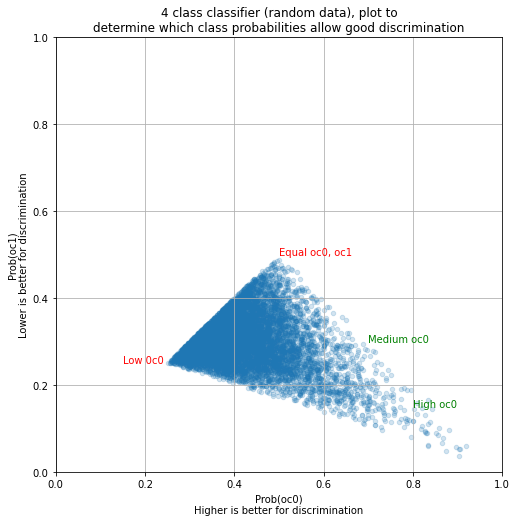

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 8))
df[["oc0", "oc1"]].plot(kind='scatter', x=0, y=1, ax=ax, alpha=0.2)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1);
ax.annotate('High oc0', (0.8, 0.15), c='green')
ax.annotate('Medium oc0', (0.7, 0.3), c='green')
ax.annotate('Equal oc0, oc1', (0.5, 0.5), c='red')
ax.annotate('Low 0c0', (0.15, 0.25), c='red')
ax.set_xlabel('Prob(oc0)\nHigher is better for discrimination')
ax.set_ylabel('Prob(oc1)\nLower is better for discrimination')
title = "4 class classifier (random data), plot to\ndetermine which class probabilities allow good discrimination"
ax.set_title(title)
ax.grid()
print('oc0 is ordered-class-label by highest probability')
print('P(oc0) >= P(oc1), other classes e.g. P(oc2) are ignored')
print('Bottom right we have high probability oc0, low prob oc1, near 0 probability oc2+ (oc2+ aren\'t shown)')
print('Middle-middle we have oc0 == oc1 with 50% probability each, so no clear discrimination')
print('Lower-left we have 0c0==oc1==25% so all 4 classes have 25% each, no clear discrimination')